In [130]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [131]:
# Data Source : http://www.statiz.co.kr/

picher_file_path = '../data/picher_stats_2017.csv'
batter_file_path = '../data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [132]:
batter.columns

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [133]:
batter_features_df = batter[['타수', '안타', '홈런', '볼넷']]

In [134]:
batter = batter.drop('BABIP', axis=1)

In [135]:
print(batter.columns)

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)', '연봉(2017)'],
      dtype='object')


In [136]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

In [137]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의합니다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
#       print(col)
#        print(df[col].dtype)
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [177]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['타수', '안타', '홈런', '볼넷']
batter_df = standard_scaling(batter, scale_columns)

In [178]:
batter_df = batter_df.rename(columns={'연봉(2018)': 'y'})
batter_df.head(5)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,y,연봉(2017)
0,최정,SK,130,527,1.231734,1.344928,4.621390,89,113,2.595310,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,1.716832,2.074446,2.289944,98,120,3.927160,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,1.537807,2.092684,1.590510,91,78,1.109785,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,1.624432,2.019732,2.056799,103,99,1.468360,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,2.074881,2.384491,1.590510,113,80,3.261235,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [140]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# 학습 데이터와 테스트 데이터로 분리합니다.
X = batter_df[batter_df.columns.difference(['선수명', 'y'])]
y = batter_df['y'] #2018년 연봉은 y로 놓음...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [168]:
print(result_df.columns)

Index(['선수명', '연봉(2017)', '예측연봉(2018)'], dtype='object')


In [173]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 로드
batter = pd.read_csv(batter_file_path)

# 선택한 feature로 데이터 준비
selected_features = ['타수', '안타', '홈런', '볼넷', '팀명']
X = batter[selected_features]
y = batter['연봉(2017)']

# '팀명'을 가변수(dummy variable)로 변환
X = pd.get_dummies(X, columns=['팀명'], drop_first=True)

# Linear Regression 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측 연봉 계산
y_pred = model.predict(X)

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = batter.sort_values(by=['연봉(2017)'], ascending=False)
result_df['예측연봉(2018)'] = y_pred

# 실제 연봉 정보를 추가합니다.
result_df['실제연봉(2018)'] = batter['연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['연봉(2017)'] != result_df['예측연봉(2018)']]
result_df = result_df.iloc[:10, :]


<Axes: xlabel='선수명'>

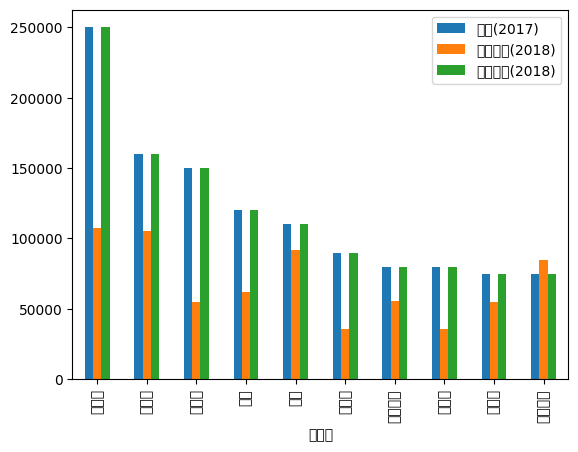

In [174]:
# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력합니다.
#mpl.rc('font', family='NanumGothicOTF')
result_df.plot(x='선수명', y=['연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")